#### Mapping CryoSat-2 fits
Creates a mosaic of CryoSat-2 tiles applying weights to each tile

In [53]:
%matplotlib widget
import glob
import re
import numpy as np
import pointCollection as pc
import matplotlib.pyplot as plt

# directory with CryoSat-2 files
#thedir = '/Volumes/ice2/ben/CS2_fit/AA_VarSigma/centers'
thedir = '/Volumes/ice2/ben/CS2_fit/GL/base/centers'
# create figure axis
fig, hax = plt.subplots(num=1, figsize=(11,16))

# weight parameters
# pad width
W0 = 1e3
# feathering width
WF = 2e3

# find list of valid files
ctr_dict={}
file_list = []
for file in glob.glob(thedir+'/E*.h5'):
    xc,yc=[int(item)*1.e3 for item in re.compile('E(.*)_N(.*).h5').search(file).groups()]
    file_list.append(file)
    
# get bounds, grid spacing and dimensions of output mosaic
mosaic=pc.grid.mosaic()
for file in file_list:
    # read CryoSat-2 grid from HDF5
    temp=pc.grid.mosaic().from_h5( file, group='z0/', field_mapping={'z':'z0'})
    ctr_dict[(np.mean(temp.x), np.mean(temp.y))]=file
    # update grid spacing of output mosaic
    mosaic.update_spacing(temp)
    # update the extents of the output mosaic
    mosaic.update_bounds(temp)
    # update dimensions of output mosaic
    mosaic.update_dimensions(temp)

# create output mosaic
mosaic.z = np.zeros(mosaic.dimensions)
mosaic.mask = np.ones(mosaic.dimensions,dtype=bool)
mosaic.weight = np.zeros((mosaic.dimensions[0],mosaic.dimensions[1]))
for file in file_list:
    # read CryoSat-2 grid from HDF5
    temp=pc.grid.mosaic().from_h5( file, group='z0/', field_mapping={'z':'z0'})
    temp=temp.weights(pad=W0, feather=WF, apply=True)
    # get the image coordinates of the input file
    iy,ix = mosaic.image_coordinates(temp)
    for band in range(mosaic.dimensions[2]):
        mosaic.z[iy,ix,band] += temp.z[:,:,band]
        mosaic.mask[iy,ix,band] = False
    # add weights to total weight matrix
    mosaic.weight[iy,ix] += temp.weight[:,:]
    # plot tile extents
    xmin,xmax,ymin,ymax = temp.extent
    xbox = [xmin,xmax,xmax,xmin,xmin]
    ybox = [ymin,ymin,ymax,ymax,ymin]
    hax.plot(xbox,ybox,c='0.2',lw=0.5,zorder=1)
 
# find valid weights
iy,ix = np.nonzero(mosaic.weight == 0)
mosaic.mask[iy,ix,:] = True
# normalize weights
iy,ix = np.nonzero(mosaic.weight > 0)
for band in range(mosaic.dimensions[2]):
    mosaic.z[iy,ix,band] /= mosaic.weight[iy,ix]
# replace invalid points with fill_value
mosaic.z[mosaic.mask] = mosaic.fill_value

# show mosaic image of elevation
hax.imshow(mosaic.z[:,:,0], extent=mosaic.extent, cmap='Spectral', origin='lower')
# set x and y labels
hax.set_ylabel('z0')
#hax.set_xticks([])
#hax.set_yticks([])

hax.set_xlim(mosaic.extent[0:2]+np.array([-5e4, 5e4]))
hax.set_ylim(mosaic.extent[2:4]+np.array([-5e4, 5e4]))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.1)
# plot the last box in red to show the structure of the mosaic
plt.plot(xbox, ybox,'r', zorder=2)
plt.show()
# write the mosaic to a geotif:
mosaic.to_geotif(thedir+'/z0_mosaic.tif', srs_epsg=3031)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: expected array of dim 2

In [57]:
import glob
import re
import numpy as np
import pointCollection as pc
import matplotlib.pyplot as plt

# directory with CryoSat-2 files
thedir = '/Volumes/ice2/ben/CS2_fit/GL/base/centers'

# weight parameters
# pad width
W0 = 1e3
# feathering width
WF = 2e3

# find list of valid files
ctr_dict={}
file_list = []
for file in glob.glob(thedir+'/E*.h5'):
    xc,yc=[int(item)*1.e3 for item in re.compile('E(.*)_N(.*).h5').search(file).groups()]
    file_list.append(file)
    
# get bounds, grid spacing and dimensions of output mosaic
mosaic=pc.grid.mosaic()
for file in file_list:
    # read CryoSat-2 grid from HDF5
    temp=pc.grid.mosaic().from_h5( file, group='dz/', field_mapping={'z':'dz'})
    ctr_dict[(np.mean(temp.x), np.mean(temp.y))]=file
    # update grid spacing of output mosaic
    mosaic.update_spacing(temp)
    # update the extents of the output mosaic
    mosaic.update_bounds(temp)
    # update dimensions of output mosaic
    mosaic.update_dimensions(temp)

# create output mosaic
mosaic.z = np.zeros(mosaic.dimensions)
mosaic.mask = np.ones(mosaic.dimensions,dtype=bool)
mosaic.weight = np.zeros((mosaic.dimensions[0],mosaic.dimensions[1]))
for file in file_list:
    # read CryoSat-2 grid from HDF5
    temp=pc.grid.mosaic().from_h5( file, group='dz/', field_mapping={'z':'dz'})
    temp=temp.weights(pad=W0, feather=WF, apply=True)
    # get the image coordinates of the input file
    iy,ix = mosaic.image_coordinates(temp)
    for band in range(mosaic.dimensions[2]):
        mosaic.z[iy,ix,band] += temp.z[:,:,band]
        mosaic.mask[iy,ix,band] = False
    # add weights to total weight matrix
    mosaic.weight[iy,ix] += temp.weight[:,:]
    # plot tile extents
    xmin,xmax,ymin,ymax = temp.extent
    xbox = [xmin,xmax,xmax,xmin,xmin]
    ybox = [ymin,ymin,ymax,ymax,ymin]
    hax.plot(xbox,ybox,c='0.2',lw=0.5,zorder=1)
 
# find valid weights
iy,ix = np.nonzero(mosaic.weight == 0)
mosaic.mask[iy,ix,:] = True
# normalize weights
iy,ix = np.nonzero(mosaic.weight > 0)
for band in range(mosaic.dimensions[2]):
    mosaic.z[iy,ix,band] /= mosaic.weight[iy,ix]
# replace invalid points with fill_value
mosaic.z[mosaic.mask] = mosaic.fill_value




In [58]:
# create figure axis
fig, hax = plt.subplots(num=1, figsize=(8,12))

# show mosaic image of elevation
him=hax.imshow((mosaic.data[:,:,-2]-mosaic.data[:,:,1])/(mosaic.t[-2]-mosaic.t[1]), vmin=-1, vmax=1, \
               extent=mosaic.extent, cmap='Spectral', origin='lower'); 
hb=plt.colorbar(him)
# set x and y labels
hb.set_label('dz/dt')
#hax.set_xticks([])
#hax.set_yticks([])

hax.set_xlim(mosaic.extent[0:2])#+np.array([-5e4, 5e4]))
hax.set_ylim(mosaic.extent[2:4])#+np.array([-5e4, 5e4]))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.1)
# plot the last box in red to show the structure of the mosaic
#plt.plot(xbox, ybox,'r', zorder=2)
plt.show()

#mosaic.to_geotif(thedir+'/dz_mosaic.tif', srs_epsg=3031)

TypeError: 'NoneType' object is not subscriptable

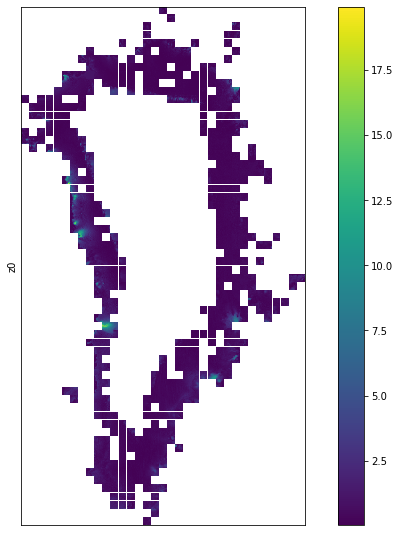

In [37]:

fig, hax = plt.subplots(num=1, figsize=(11,8))


# show mosaic image of elevation
him=hax.imshow(np.std(mosaic.data[:,:,1:-2], axis=2), extent=mosaic.extent,  origin='lower'); 
plt.colorbar(him)
# set x and y labels
hax.set_ylabel('z0')
hax.set_xticks([])
hax.set_yticks([])

hax.set_xlim(mosaic.extent[0:2])#+np.array([-5e4, 5e4]))
hax.set_ylim(mosaic.extent[2:4])#+np.array([-5e4, 5e4]))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.1)
# plot the last box in red to show the structure of the mosaic
plt.show()



In [24]:
?mosaic.to_geotif

In [25]:
mosaic.z=mosaic.data
